<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p1_1_cnn_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each

In [ ]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
import os
import math

In [ ]:
np.random.seed(21)
tf.random.set_seed(21)

In [ ]:
num_classes=100

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [ ]:
x_train.shape, x_test.shape, y_train.shape, x_train[1].shape, np.unique(y_train)

((50000, 32, 32, 3),
 (10000, 32, 32, 3),
 (50000, 1),
 (32, 32, 3),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

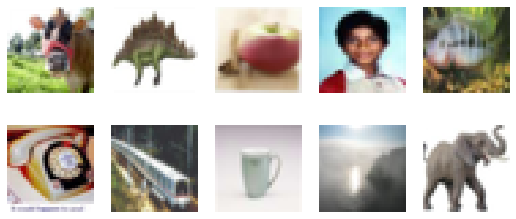

In [ ]:
plt.figure(figsize=(9, 4))
for index, image in enumerate(x_train[:10,:]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.show()

Now we convert class target vectors to binary class matrices

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)# cause error without this code: from tensorflow import keras
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
x_train=x_train.astype('float32')/255   #normalize tha data
x_test=x_test.astype('float32')/255

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
model=keras.models.Sequential()
input_shape=x_train.shape[1:]

model.add(Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='same',activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32,3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.3))


model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

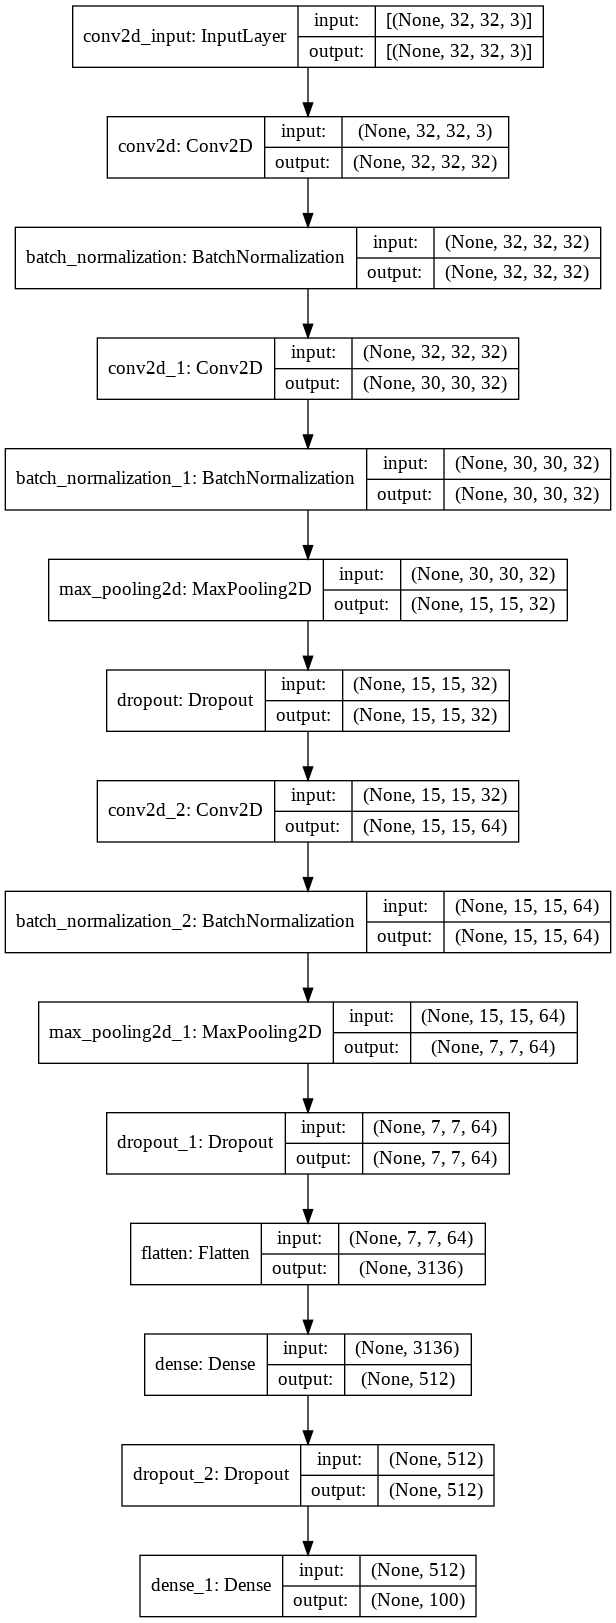

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')

checkpoint=keras.callbacks.ModelCheckpoint('p1.cnn.cifar100.h5', save_best_only=True)

early_stopping= keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=1, restore_best_weights=False
) #Stop training when a monitored metric has stopped improving.


hist=model.fit(x_train,y_train,batch_size=32,epochs=2,
               validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/2
1250/1250 [==============================] - 20s 16ms/step - loss: 6.2502 - accuracy: 0.0514 - val_loss: 6.1965 - val_accuracy: 0.0690
Epoch 2/2
1250/1250 [==============================] - 17s 13ms/step - loss: 6.1538 - accuracy: 0.0559 - val_loss: 6.1600 - val_accuracy: 0.0684


In [ ]:
model=keras.models.load_model('p1.cnn.cifar100.h5') #rollback to best model

In [ ]:
#history=keras.callbacks.History()
hist.history.keys(), hist.params

(dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']),
 {'epochs': 2, 'steps': 1250, 'verbose': 1})

In [ ]:
hist.history

{'accuracy': [0.05144999921321869, 0.055925000458955765],
 'loss': [6.250241279602051, 6.153783798217773],
 'val_accuracy': [0.0689999982714653, 0.06840000301599503],
 'val_loss': [6.196523666381836, 6.160036563873291]}

Text(0.5, 1.0, 'Model Performance')

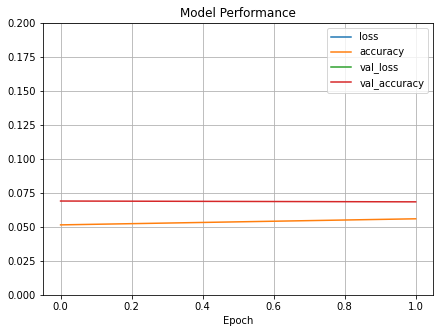

In [ ]:
  #plt.plot(hist.history['accuracy'])
  #plt.plot(hist.history['val_accuracy'])
  #plt.legend(['Train','validation'],loc='lower right')
  #or
df=pd.DataFrame(hist.history)
df.plot(figsize=(7,5))  
plt.grid()
plt.ylim(0,0.2)
plt.xlabel('Epoch')
plt.title('Model Performance')

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 6.1627 - accuracy: 0.0680


[6.16272497177124, 0.06800000369548798]

In [ ]:
model.predict(x_test[:1,:]).round(2)

array([[0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01,
        0.01, 0.01, 0.02, 0.  , 0.02, 0.01, 0.02, 0.  , 0.01, 0.02, 0.  ,
        0.02, 0.01, 0.04, 0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.01, 0.02,
        0.  , 0.  , 0.01, 0.01, 0.02, 0.  , 0.02, 0.01, 0.02, 0.  , 0.  ,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.02,
        0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.02, 0.04, 0.01,
        0.  , 0.02, 0.02, 0.02, 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.01,
        0.01]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[:1,:]))

24

**Saving & Restoring**

In [ ]:
model.save_weights('p1.cnn.cifar100.weights.ckpt')

In [ ]:
model.load_weights('p1.cnn.cifar100.weights.ckpt')

In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.

In 2D CNN, kernel moves in 2 directions. Input and output data of 2D CNN is 3 dimensional. Mostly used on Image data.

In 3D CNN, kernel moves in 3 directions. Input and output data of 3D CNN is 4 dimensional. Mostly used on 3D Image data (MRI, CT Scans).

Cross entropy loss function is an optimization function which is used in case of training a classification model which classifies the data by predicting the probability of whether the data belongs to one class or the other class. One of the examples where Cross entropy loss function is used is Logistic Regression

binary_crossentropy: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.

categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.utils to_categorical method.

sparse_categorical_crossentropy: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…). This loss function is mathematically same as the categorical_crossentropy. It just has a different interface.

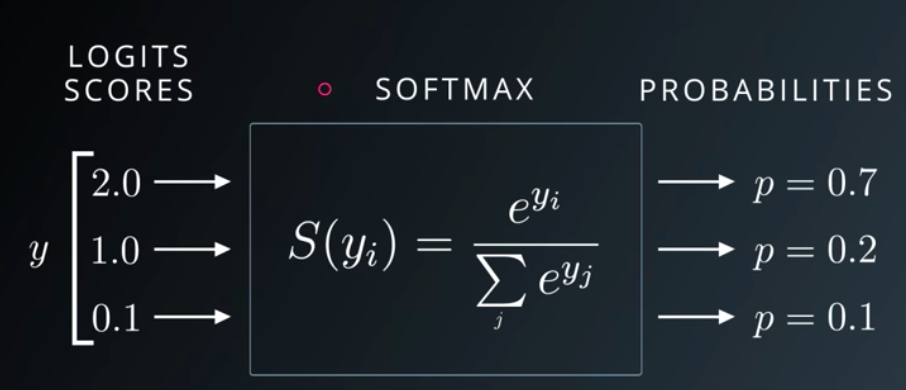

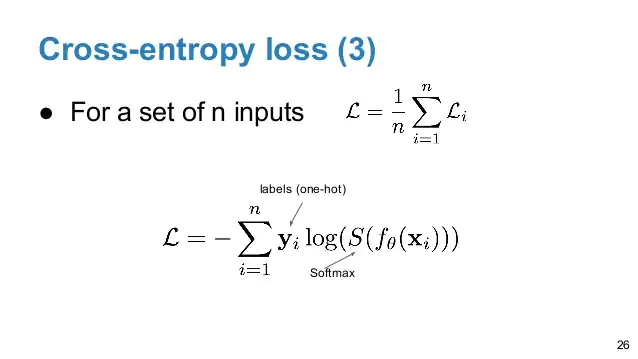

Optimizers are used to change the  weights and learning rate to reduce the loss function.

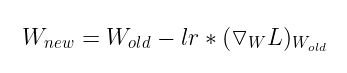

In **CNN**, we increase the number of filters in deeper Convolution layers for complex images

Every layer of filters is there to capture patterns. For example, the first layer of filters captures patterns like edges, corners, dots etc. Subsequent layers combine those patterns to make bigger patterns (like combining edges to make squares, circles, etc.).

Now as we move forward in the layers, the patterns get more complex; hence there are larger combinations of patterns to capture. That's why we increase the filter size in subsequent layers to capture as many combinations as possible

**ModelCheckpoint** callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

**import os**

The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system-dependent functionality. The os and os.path modules include many functions to interact with the file system

**from keras.preprocessing.image import ImageDataGenerator**

Keras ImageDataGenerator is a gem! It lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory!

**from keras.models import sequential**

Sequential groups a linear stack of layers into a tf.keras.Model . Sequential provides training and inference features on this model

**from keras.layers import Dense**

regular densely-connected NN layer.

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

These are all attributes of Dense.

units: Positive integer, dimensionality of the output space.

activation: use_bias: kernel_initializer: bias_initializer: kernel_regularizer: bias_regularizer: activity_regularizer: kernel_constraint: bias_constraint:

**from keras.layers import Dropout**

Applies Dropout to the input.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting trainable=False for a Dropout layer. trainable does not affect the layer's behavior, as Dropout does not have any variables/weights that can be frozen during training.)

Arguments

rate: Float between 0 and 1. Fraction of the input units to drop.

noise_shape: For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).

seed: A Python integer to use as random seed.

**from keras.layers import Activation**

Applies an activation function to an output.

Arguments

activation: Activation function, such as tf.nn.relu, or string name of built-in activation function, such as "relu".

Input shape: Arbitrary. Use the keyword argument input_shape (tuple of integers, does not include the batch axis) when using this layer as the first layer in a model.

Output shape: Same shape as input.

**from keras. layers import Flatten**

Flattens the input. Does not affect the batch size.

Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

**from keras.layers import CONV2D**

2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

Returns

A tensor of rank 4+ representing activation(conv2d(inputs, kernel) + bias).

Arguments

filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last.

activation: Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).

use_bias: Boolean, whether the layer uses a bias vector.

kernel_initializer: Initializer for the kernel weights matrix (see keras.initializers). Defaults to 'glorot_uniform'.

bias_initializer: Initializer for the bias vector (see keras.initializers). Defaults to 'zeros'.

kernel_regularizer: Regularizer function applied to the kernel weights matrix (see keras.regularizers).

bias_regularizer: Regularizer function applied to the bias vector (see keras.regularizers).

activity_regularizer: Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).

kernel_constraint: Constraint function applied to the kernel matrix (see keras.constraints).allow setting constraints (eg. non-negativity) on model parameters during training. They are per-variable projection functions applied to the target variable after each gradient update (when using fit()).

bias_constraint: Constraint function applied to the bias vector (see keras.constraints).

**from keras.layers MaxPooling2D**

Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

Arguments

pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.

strides: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.

padding: One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

